# Rafał Gołębiowski
# Wczytać zbiór danych: autos.arff (scipy.io.arff, np.loadtxt, pandas.read_csv, DataFrame)

In [1]:
import pandas as pd
autos = pd.read_csv("autos.csv")

# Wyznaczyć średnie zużycie paliwa w mieście i na autostradzie dla każdej marki samochodu (zmienne city-mpg, highway-mpg i make)

In [2]:
print(autos.groupby("make")["citympg", "highwaympg"].mean())

                citympg  highwaympg
make                               
alfaromero    20.333333   26.666667
audi          18.857143   24.142857
bmw           19.375000   25.375000
chevrolet     41.000000   46.333333
dodge         28.000000   34.111111
honda         30.384615   35.461538
isuzu         31.000000   36.000000
jaguar        14.333333   18.333333
mazda         25.705882   31.941176
mercedesbenz  18.500000   21.000000
mercury       19.000000   24.000000
mitsubishi    24.923077   31.153846
nissan        27.000000   32.944444
peugot        22.454545   26.636364
plymouth      28.142857   34.142857
porsche       17.400000   26.000000
renault       23.000000   31.000000
saa           20.333333   27.333333
subaru        26.333333   30.750000
toyota        27.500000   32.906250
volkswagen    28.583333   34.916667
volvo         21.181818   25.818182


# Wygenerować przykładowe dane poleceniem make_moons z liczbą próbek równą 1000 oraz ustawiając parametr noise=0.5.

In [3]:
from sklearn.datasets import make_moons
[X, y] = make_moons(n_samples=1000, noise=0.5)

# Zbudować na pełnych danych klasyfikator AdaBoost (sklearn.ensemble.AdaBoostClassifier z liczbą słabych klasyfikatorów równ¡ 100 oraz drzewem decyzyjnym o głębokości 3 jako słaby klasyfikator (base_classifier).

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
clf = AdaBoostClassifier(n_estimators = 100, base_estimator = DecisionTreeClassifier(max_depth=3))
clf.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

# Dokonać predykcji na tych samych danych (predict), wyznaczyć macierz konfuzji oraz dokładność (sklearn.metrics).

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
yPred = clf.predict(X)
print(confusion_matrix(y, yPred))
print(accuracy_score(y, yPred))

[[500   0]
 [  0 500]]
1.0


# Zwizualizować wygenerowane dane (scatter) oraz powierzchnię separujacą klasyfikatora.

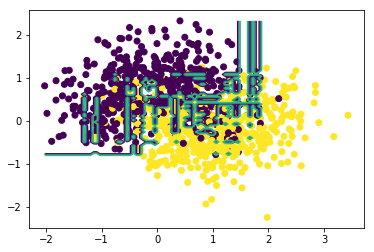

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(X[:, 0], X[:, 1], c = y)

x1 = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
x2 = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
X1Mesh, X2Mesh = np.meshgrid(x1, x2)

YMesh = clf.predict(np.vstack([X1Mesh.ravel(), X2Mesh.ravel()]).T).reshape(X1Mesh.shape)
plt.contour(X1Mesh, X2Mesh, YMesh, levels = 2)


# Wyznaczyć miarę F1 tego klasyfikatora stosując metodę kroswalidacji.

In [7]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(clf, X, y, cv=10, scoring='f1')
print(cv_results['test_score'].mean())

0.7720195609650442


# Narysować wykres konturowy funkcji:
gęstość siatki ustawic na 50 (figure, meshgrid, contour). Rysunek wyświetlic na ekranie oraz zapisać do pliku rys.pdf.

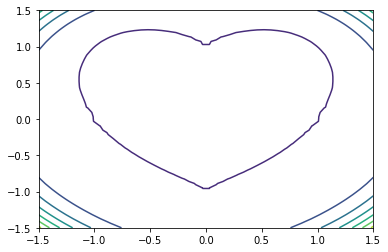

In [8]:
x1 = np.linspace(-1.5, 1.5, 50)
x2 = np.linspace(-1.5, 1.5, 50)
X1Mesh, X2Mesh = np.meshgrid(x1, x2)

YMesh = (X1Mesh**2 + X2Mesh**2 - 1)**3 - X1Mesh**2 * X2Mesh**3
plt.contour(X1Mesh, X2Mesh, YMesh)
plt.savefig("rys.pdf")